# Toronto Crime Rates Analysis

# Part 2: Toronto Assault Overview 





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

# 1. Loading the Dataset

Fortunetly, Toronto Police Service provide a public safety data portal which contains a number of useful crime data sets. From here, I seleted the "MCI 2014 to 2018" spreadsheet which includes all Major Crime Indicators (MCI) 2014 to 2018 occurrences by reported date and related offences: http://data.torontopolice.on.ca/datasets/mci-2014-to-2018

Upon downloading this file, I did some preprocessing and loaded the file.

In [2]:
toronto_crime = pd.read_csv('./Toronto_MCI.csv')

In [3]:
toronto_crime.occurrenceyear.unique()

array([2014., 2015., 2016., 2017., 2018.,   nan])

# 2. Data Cleaning and Preparation

#### Checking for NaN Values
- Although these were removed during the preprocessing of the data, I wanted to ensure none were loaded during the loading process


In [4]:
nan_df = toronto_crime[toronto_crime.isnull().any(axis=1)]
nan_df[:]

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
166500,GO-2015643612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166501,GO-2015641587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166502,GO-2015657994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166503,GO-2015669925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166504,GO-2015515110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167520,GO-2018885860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167521,GO-2018939395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167522,GO-2018940481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167523,GO-2018940756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
toronto_crime = toronto_crime.dropna(how='any')
nan_df = toronto_crime[toronto_crime.isnull().any(axis=1)]
nan_df[:]

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long


#### Change the columns to the appropriate data types

In [6]:
toronto_crime.dtypes

event_unique_id         object
occurrencedate          object
premisetype             object
offence                 object
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour         float64
MCI                     object
Neighbourhood           object
Lat                    float64
Long                   float64
dtype: object

##### Based on this, the only change I needed to make was on the occurrencedata column.

In [7]:
toronto_crime['occurrencedate'] = pd.to_datetime(toronto_crime['occurrencedate'])

In [8]:
toronto_crime.dtypes

event_unique_id                     object
occurrencedate         datetime64[ns, UTC]
premisetype                         object
offence                             object
occurrenceyear                     float64
occurrencemonth                     object
occurrenceday                      float64
occurrencedayofyear                float64
occurrencedayofweek                 object
occurrencehour                     float64
MCI                                 object
Neighbourhood                       object
Lat                                float64
Long                               float64
dtype: object

# 3. Analysis

### A Deeper Dive into the Assault MCI


In [9]:
#Create the assault dataframe
assault_df = toronto_crime[toronto_crime['MCI'].str.contains('Assault')]
assault_df.head()

,event_unique_id,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long
1,GO-20142411379,2014-07-02 00:20:00+00:00,Outside,Pointing A Firearm,2014.0,July,2.0,183.0,Wednesday,0.0,Assault,Newtonbrook West (36),43.777592,-79.425400
4,GO-20142417548,2014-07-02 20:52:00+00:00,Commercial,Assault,2014.0,July,2.0,183.0,Wednesday,20.0,Assault,Milliken (130),43.835884,-79.254334
6,GO-20142526048,2014-07-18 23:15:00+00:00,House,Assault,2014.0,July,18.0,199.0,Friday,23.0,Assault,Yorkdale-Glen Park (31),43.709179,-79.466019
11,GO-20142664663,2014-08-09 01:05:00+00:00,Apartment,Assault With Weapon,2014.0,August,9.0,221.0,Saturday,1.0,Assault,Eglinton East (138),43.738136,-79.237938
14,GO-20142723301,2014-08-17 23:06:00+00:00,Other,Assault,2014.0,August,17.0,229.0,Sunday,23.0,Assault,Junction Area (90),43.665417,-79.463265


##### Offence types

In [10]:
offence_type = assault_df.groupby('offence').count()['MCI']
offence_type_df = offence_type.to_frame().reset_index()
offence_type_df.columns = ['Offence', 'Count']
print(offence_type_df.to_string(index=False))

                        Offence  Count
    Administering Noxious Thing    232
  Aggravated Aslt Peace Officer     10
             Aggravated Assault   1521
 Aggravated Assault Avails Pros     12
 Air Gun Or Pistol: Bodily Harm     17
                        Assault  61682
    Assault - Force/Thrt/Impede    210
 Assault - Resist/ Prevent Seiz   1959
            Assault Bodily Harm   4277
          Assault Peace Officer   2879
  Assault Peace Officer Wpn/Cbh    251
            Assault With Weapon  14564
    Crim Negligence Bodily Harm     68
 Disarming Peace/Public Officer     61
 Discharge Firearm - Recklessly    650
  Discharge Firearm With Intent   1059
             Pointing A Firearm    584
 Set/Place Trap/Intend Death/Bh      1
 Traps Likely Cause Bodily Harm      1
 Unlawfully Causing Bodily Harm     10
 Use Firearm / Immit Commit Off     97


##### Number of Assaults by Year

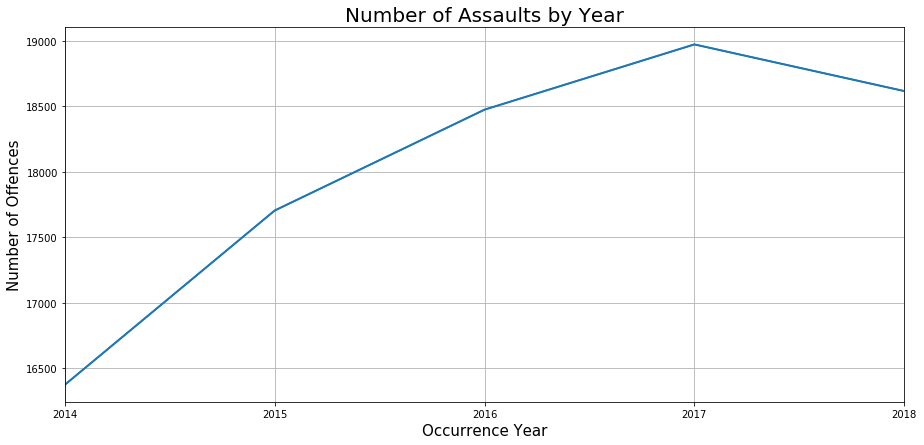

In [11]:
#Group and then plot the result

assault_year = assault_df.groupby('occurrenceyear').count()['offence']

assault_year_df = assault_year.to_frame().reset_index()
year = assault_year_df['occurrenceyear']
count_for_years = assault_year_df['offence']

width = 13
height = 6
plt.figure(figsize=(width, height))

plt.plot(year,count_for_years)

assault_year.plot.line(linewidth=2, markersize=15,color='C0' )
plt.ylabel('Number of Offences',  fontsize=15)
plt.xlabel('Occurrence Year',  fontsize=15)
plt.grid()
plt.tight_layout()
plt.xticks(year)
plt.title('Number of Assaults by Year', fontsize = 20)
plt.show()

##### Number of Assaults by Month per Year

In [12]:
#group by the year and month
assault_monthly_year = assault_df.groupby(['occurrenceyear','occurrencemonth']).count()['offence']

#convert to a dataframe and reset the index
assault_monthly_year_df = assault_monthly_year.to_frame().reset_index()
assault_monthly_year_df.head()

,occurrenceyear,occurrencemonth,offence
0,2014.0,April,1233
1,2014.0,August,1475
2,2014.0,December,1323
3,2014.0,February,1156
4,2014.0,January,1270


In [13]:
#Add a new column for Month + Year
assault_monthly_year_df["Month"] =  assault_monthly_year_df["occurrencemonth"] + " " + assault_monthly_year_df["occurrenceyear"].map(str)

In [14]:
#sort the dataframe by firstly categorising the months
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
#categorise the occurrencemonth column
assault_monthly_year_df['occurrencemonth'] = pd.Categorical(assault_monthly_year_df['occurrencemonth'], categories=months, ordered=True)

#sort the df, first by year then month
assault_monthly_year_df = assault_monthly_year_df.sort_values(['occurrenceyear', 'occurrencemonth'])
assault_monthly_year_df.head()

,occurrenceyear,occurrencemonth,offence,Month
4,2014.0,January,1270,January 2014.0
3,2014.0,February,1156,February 2014.0
7,2014.0,March,1215,March 2014.0
0,2014.0,April,1233,April 2014.0
8,2014.0,May,1490,May 2014.0


In [15]:
month_assault = assault_monthly_year_df['Month']
no_offences_assault = assault_monthly_year_df['offence']

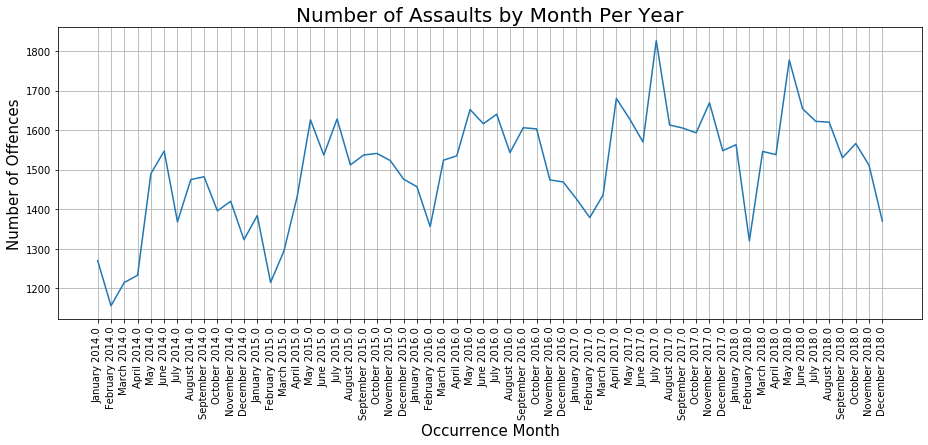

In [25]:
#plot

plt.figure(figsize=(width, height))

plt.plot(month_assault,no_offences_assault)

plt.ylabel('Number of Offences', fontsize=15)
plt.xlabel('Occurrence Month', fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.title('Number of Assaults by Month Per Year',fontsize = 20)
plt.show()

##### The Day of the Month an Assault is Most Likely to Occur (2018)

In [17]:
#convert to string
assault_df['occurrenceyear'] = assault_df['occurrenceyear'].astype(str)

/Users/niallyorke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#create a filtered dataframe to display only the year 2018 
assault_2018 = assault_df[assault_df['occurrenceyear'].str.contains('2018')]


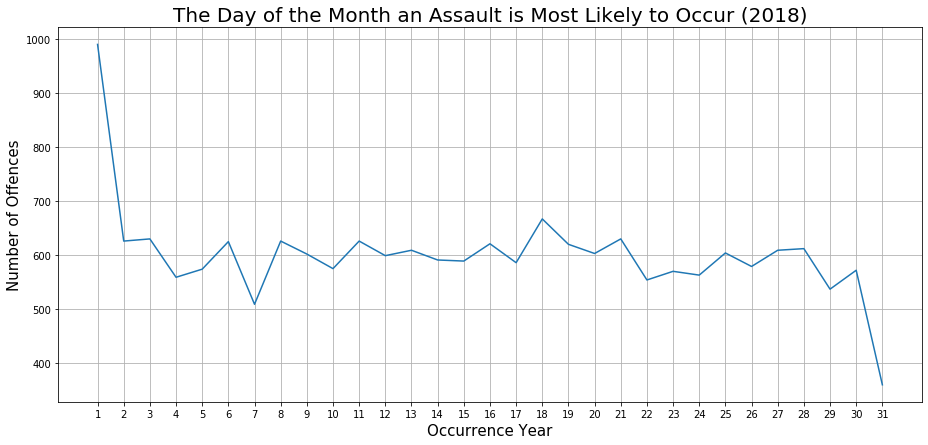

In [19]:
#Plot

assault_day_month = assault_2018.groupby('occurrenceday').count()['MCI']

assault_day_month_df = assault_day_month.to_frame().reset_index()
days_month = assault_day_month_df['occurrenceday']
count_for_days_month = assault_day_month_df['MCI']

plt.figure(figsize=(width, height))

plt.plot(days_month,count_for_days_month)

plt.ylabel('Number of Offences', fontsize=15)
plt.xlabel('Occurrence Year', fontsize=15)
plt.xticks(days_month)
plt.grid()

plt.tight_layout()
plt.title('The Day of the Month an Assault is Most Likely to Occur (2018)',fontsize = 20)
plt.show()

##### The Day of the Week an Assault is Most Likely to Occur (2018)

In [20]:
assault_day_week = assault_2018.groupby('occurrencedayofweek').count()['offence']

assault_day_week_df = assault_day_week.to_frame().reset_index()
assault_day_week_df

,occurrencedayofweek,offence
0,Friday,2677
1,Monday,2600
2,Saturday,2797
3,Sunday,2822
4,Thursday,2641
5,Tuesday,2462
6,Wednesday,2618


In [21]:
#pd.Categorical was returning NaN for each day of the week
#Reindex() was used instead

assault_day_week_df = assault_day_week_df.reindex(index = [1,5,6,4,0,2,3])

In [22]:
assault_day_week_df

,occurrencedayofweek,offence
1,Monday,2600
5,Tuesday,2462
6,Wednesday,2618
4,Thursday,2641
0,Friday,2677
2,Saturday,2797
3,Sunday,2822


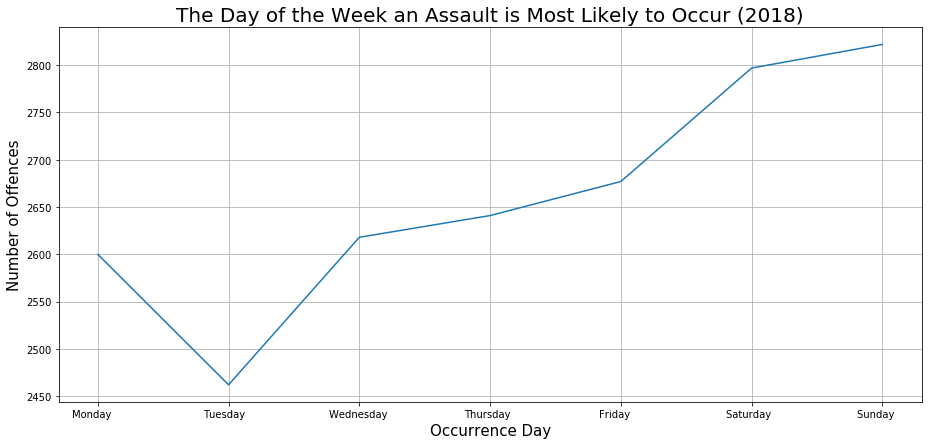

In [23]:
days_of_week = assault_day_week_df['occurrencedayofweek']
count_for_days_week = assault_day_week_df['offence']

plt.figure(figsize=(width, height))

plt.plot(days_of_week,count_for_days_week)

plt.ylabel('Number of Offences', fontsize=15)
plt.xlabel('Occurrence Day', fontsize=15)
plt.xticks(days_of_week)
plt.grid()

plt.tight_layout()
plt.title('The Day of the Week an Assault is Most Likely to Occur (2018)',fontsize = 20)
plt.show()

##### The Time of the Day  an Assault is Most Likely to Occur (2018)

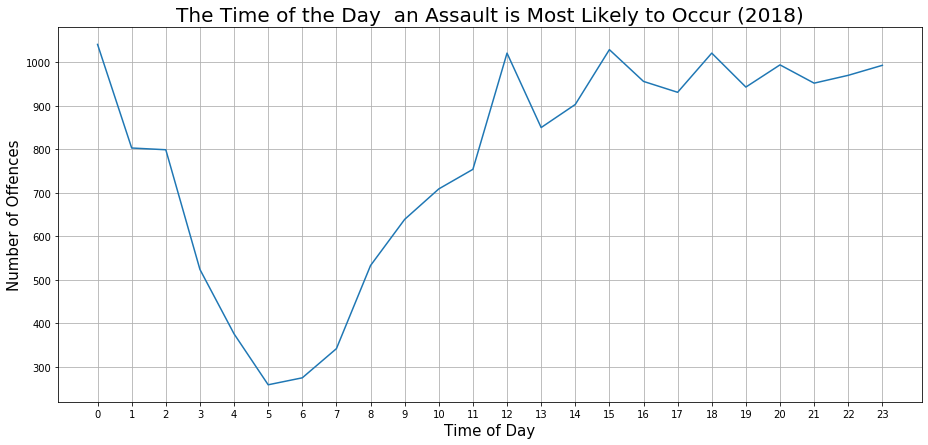

In [24]:
assault_day_hour = assault_2018.groupby('occurrencehour').count()['MCI']

ash_df = assault_day_hour.to_frame().reset_index()
day_hour = ash_df['occurrencehour']
count_for_days_hours = ash_df['MCI']

plt.figure(figsize=(width, height))

plt.plot(day_hour,count_for_days_hours)
plt.ylabel('Number of Offences',  fontsize=15)
plt.xlabel('Time of Day',  fontsize=15)
plt.grid()
plt.xticks(day_hour)
plt.tight_layout()
plt.title('The Time of the Day  an Assault is Most Likely to Occur (2018)', fontsize = 20)
plt.show()